# Лабораторная работа №5. Ансамбли моделей машинного обучения.
## Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие ансамблевые модели:
    - одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
    - AdaBoost;
    - градиентный бустинг
5. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier
import seaborn as sns
%matplotlib inline 
sns.set(style="ticks")

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Выберем исходный набор данных и проведём разбиение на обучающую и тестовую выборки
iris = load_iris()

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=1)

In [4]:
# Обучение модели бэггинга
bg = BaggingClassifier(n_estimators=15, oob_score=True, random_state=1)
bg.fit(iris_X_train, iris_y_train)

BaggingClassifier(n_estimators=15, oob_score=True, random_state=1)

In [5]:
# Оценка качества модели - accuracy (доля правильных ответов)
accuracy_score(iris_y_test, bg.predict(iris_X_test))

0.9466666666666667

In [6]:
from sklearn.ensemble import AdaBoostClassifier


ada = AdaBoostClassifier(n_estimators=15, random_state=1)
ada.fit(iris_X_train, iris_y_train)

/home/bogdan/.virtualenvs/data-analyse/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=15, random_state=1)

In [7]:
accuracy_score(iris_y_test, ada.predict(iris_X_test))

0.9066666666666666

In [8]:
# Обучение модели бустинга (градиентный спуск)
gb = GradientBoostingClassifier(n_estimators=15, random_state=1)
gb.fit(iris_X_train, iris_y_train)

GradientBoostingClassifier(n_estimators=15, random_state=1)

In [9]:
# Оценка качества модели
accuracy_score(iris_y_test, gb.predict(iris_X_test))

0.96

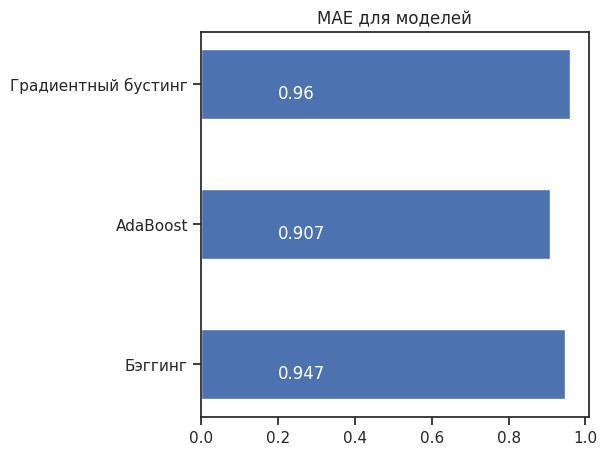

In [10]:
from matplotlib import pyplot as plt
import numpy as np


def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

labels = ['Бэггинг','AdaBoost', 'Градиентный бустинг']
mae = [0.9466666666666667, 0.9066666666666666, 0.96]

vis_models_quality(mae, labels, 'MAE для моделей')

# Лабораторная работа №6. Ансамбли моделей машинного обучения.
## Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие ансамблевые модели:
    - одну из моделей группы стекинга.
    - модель многослойного персептрона.
    - двумя методами на выбор из семейства МГУА
5. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

#### Стекинг

In [11]:
#стекинг

from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

dataset = Dataset(iris_X_train, iris_y_train, iris_X_test, iris_y_test)

model_tree = Regressor(dataset=dataset, estimator=DecisionTreeClassifier, name='tree')
model_lr = Regressor(dataset=dataset, estimator=RidgeClassifier,name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestClassifier, parameters={'n_estimators': 50},name='rf')

pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=DecisionTreeClassifier)
results = stacker.validate(k=10,scorer=accuracy_score)

Metric: accuracy_score
Folds accuracy: [1.0, 0.875, 0.875, 0.875, 1.0, 1.0, 0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571]
Mean accuracy: 0.8910714285714286
Standard Deviation: 0.08430765452937769
Variance: 0.007107780612244899


In [12]:
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.0, 0.125, 0.125, 0.125, 0.0, 0.0, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
Mean accuracy: 0.10892857142857142
Standard Deviation: 0.08430765452937766
Variance: 0.007107780612244895


#### Многослойный персептрон

In [13]:
#многослойный персептрон
from sklearn.neural_network import MLPRegressor

In [14]:
perceptron_model = MLPRegressor(solver='lbfgs', alpha=1e-5,
                 hidden_layer_sizes=(5, 2), random_state=1)
perceptron_model.fit(iris_X_train, iris_y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
             solver='lbfgs')

In [15]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(iris_y_test, perceptron_model.predict(iris_X_test))

0.6943999999997224

### МГУА

Обучим модель МГУА с помощью библиотеки GmdhPy:

In [16]:
from gmdh import Combi, Mia

# Обучение модели COMBI
combi = Combi()
combi.fit(iris_X_train, iris_y_train)

# Предсказания модели COMBI
y_pred_combi = combi.predict(iris_X_test)

# Обучение модели MIA
mia = Mia()
mia.fit(iris_X_train, iris_y_train)

# Предсказания модели MIA
y_pred_mia = mia.predict(iris_X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score


mae_combi = mean_absolute_error(iris_y_test, y_pred_combi)
r2_combi = r2_score(iris_y_test, y_pred_combi)

print(f"COMBI - MAE: {mae_combi}, R2: {r2_combi}")

# Оценка модели MIA
mae_mia = mean_absolute_error(iris_y_test, y_pred_mia)
r2_mia = r2_score(iris_y_test, y_pred_mia)

print(f"MIA - MAE: {mae_mia}, R2: {r2_mia}")

COMBI - MAE: 0.2271769759116325, R2: 0.8847971203737415
MIA - MAE: 0.18803398168201854, R2: 0.9058435783595216


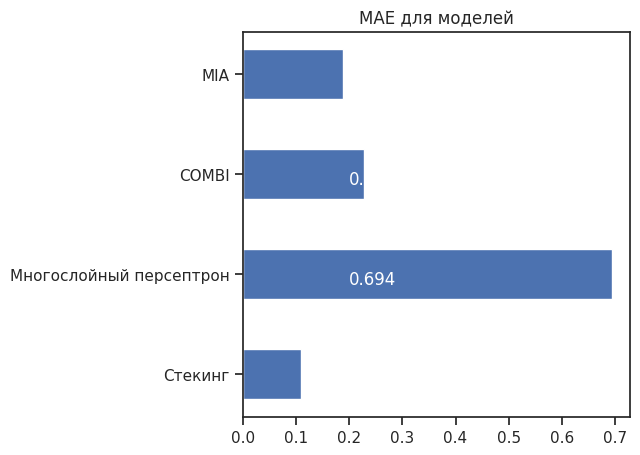

In [18]:
labels = ['Стекинг','Многослойный персептрон', 'COMBI', 'MIA']
mae = [0.11, 0.6943999999997224, 0.2271769759116325, 0.18803398168201854]

vis_models_quality(mae, labels, 'MAE для моделей')